In [6]:
import ROOT as rt
from larcv import larcv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Specify location of dataset
dataset = "/home/phy68/data/practice_test_5k.root"

In [4]:
# Get a look of the ROOT Trees inside the file
f = rt.TFile(dataset) # open file
f.ls() # print contents
f.Close() # close file (since we dont intend to interact with file directly)

TFile**		/home/phy68/data/practice_test_5k.root	
 TFile*		/home/phy68/data/practice_test_5k.root	
  KEY: TTree	image2d_data_tree;1	data tree
  KEY: TTree	particle_mctruth_tree;1	mctruth tree


In [5]:
# create instance of IOManager that will interface with file
io = larcv.IOManager(larcv.IOManager.kREAD,"input",larcv.IOManager.kTickForward)
io.add_in_file( dataset )
io.initialize()

True

    [NORMAL]  <input::prepare_input> Opening a file in READ mode: /home/phy68/data/practice_test_5k.root
    [NORMAL]  <input::initialize> Prepared input with 5000 entries...


Warning in <TStreamerInfo::Build>: larcv::EventParticle: base class larcv::ParticleSet has no streamer or dictionary it will not be saved


In [7]:
# Define dictionary for interpretting class label
labelname = {0:"proton",
            1:"electron",
            2:"pion",
            3:"muon",
            4:"photon"}

In [12]:
NENTRIES = io.get_n_entries()
entry_list = np.random.randint(0,NENTRIES-1,size=10)
print(entry_list)

[1584 1563 3732 3712  753 4034 3305 3040 3322 4166]


ENTRY[1584] PDG=22
ENTRY[1563] PDG=22
ENTRY[3732] PDG=211
ENTRY[3712] PDG=211
ENTRY[753] PDG=11
ENTRY[4034] PDG=2212
ENTRY[3305] PDG=211
ENTRY[3040] PDG=211


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


ENTRY[3322] PDG=211
ENTRY[4166] PDG=2212


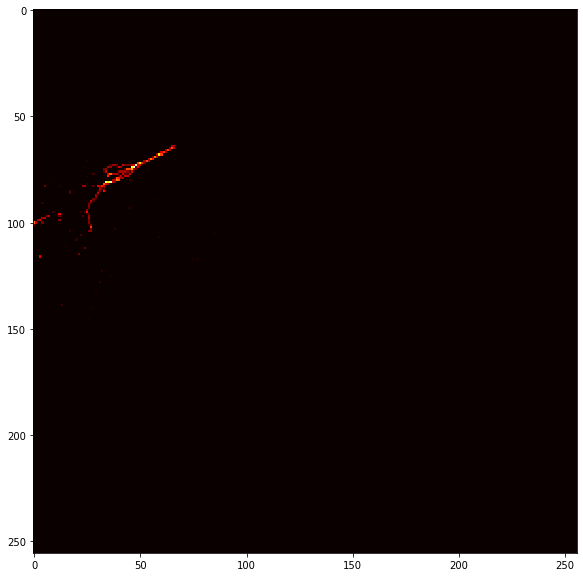

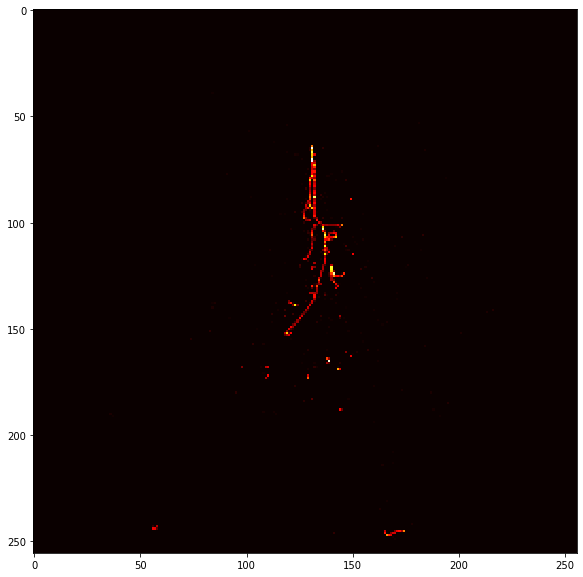

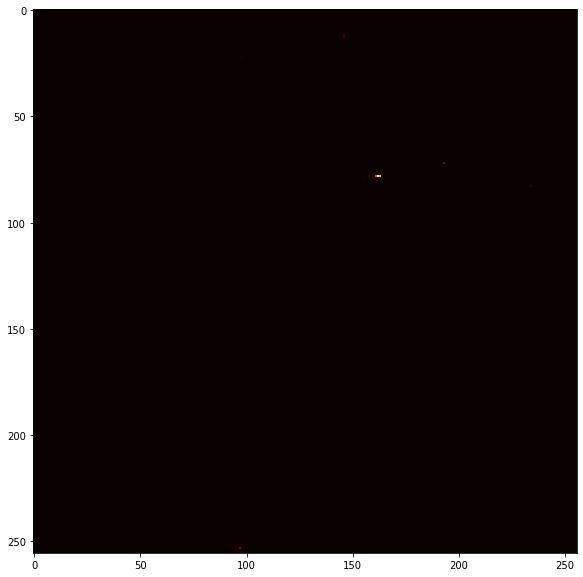

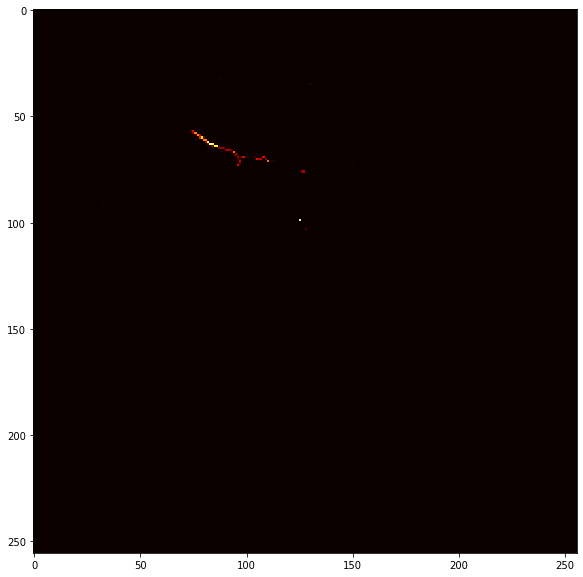

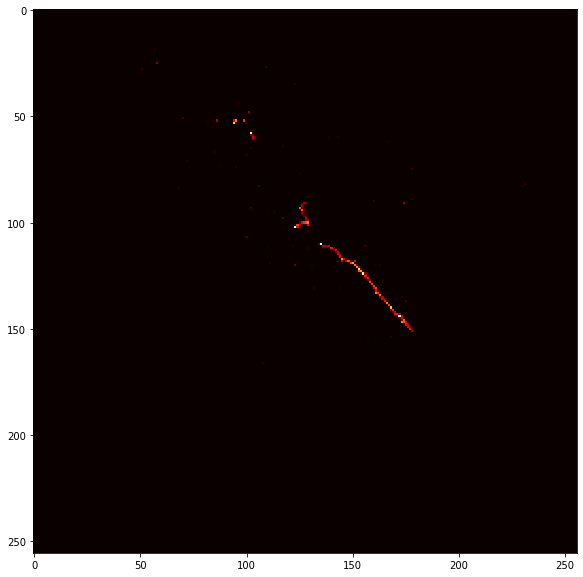

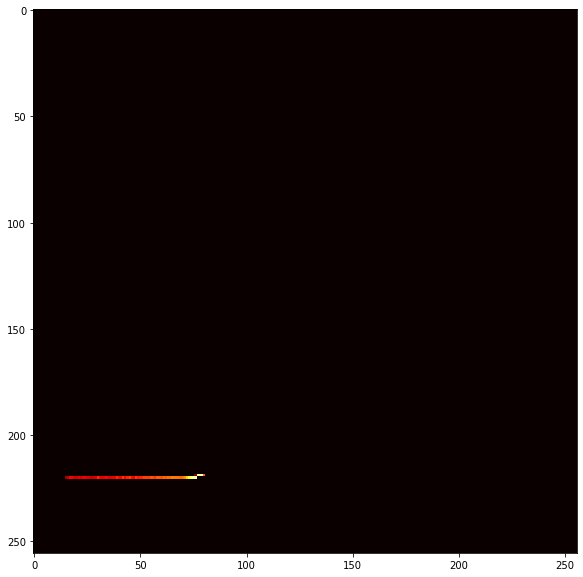

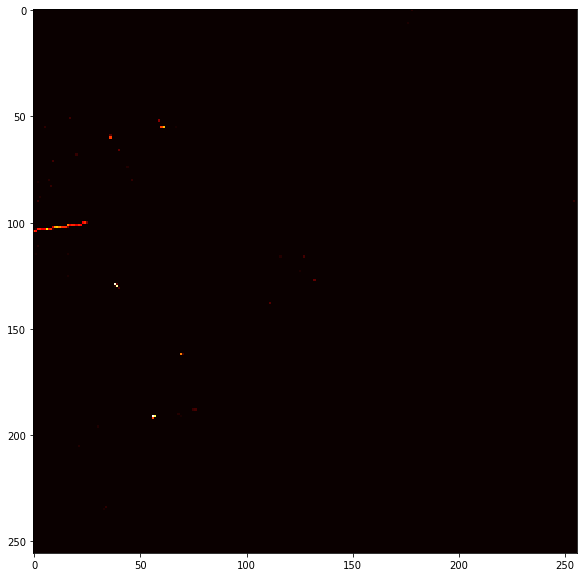

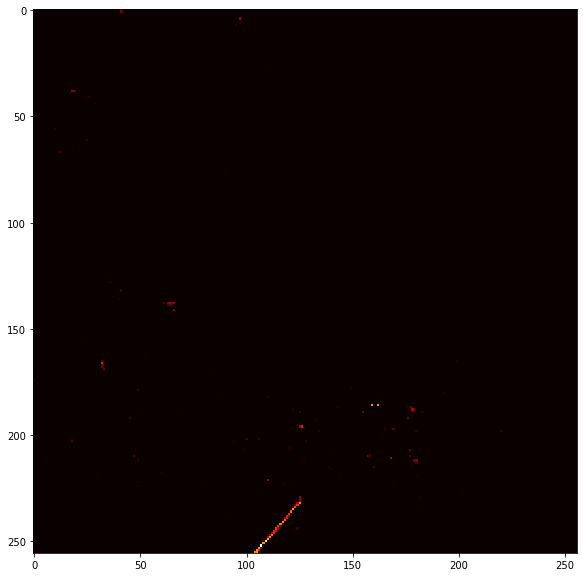

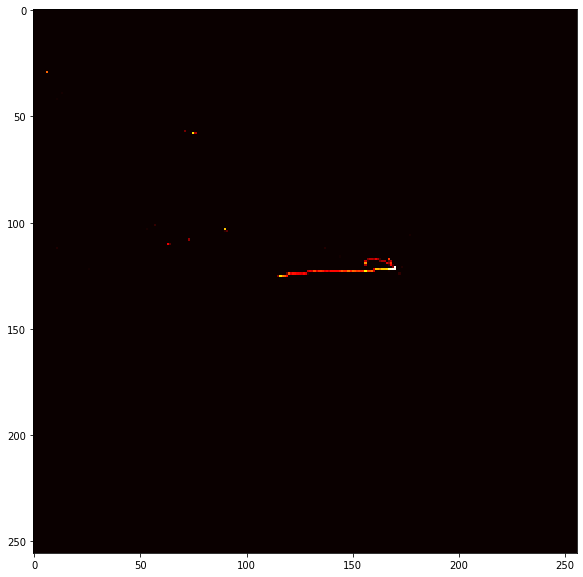

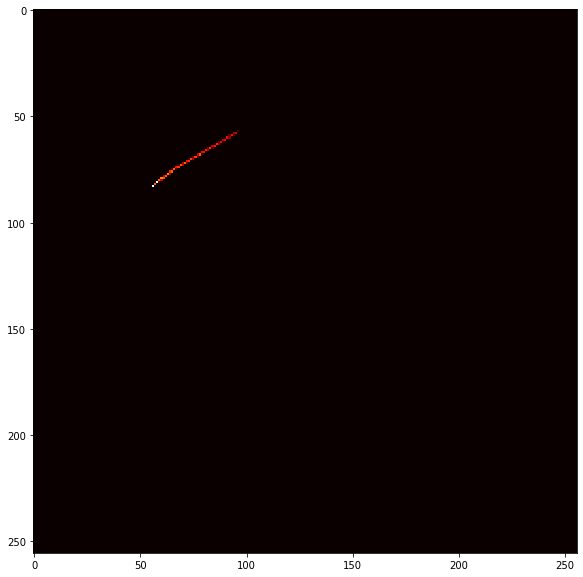

In [18]:
for n,entry in enumerate(entry_list.tolist()):
    
    io.read_entry(entry)
    ev_data = io.get_data(larcv.kProductImage2D,"data")
    ev_particle = io.get_data(larcv.kProductParticle, "mctruth")
    pdg = ev_particle.as_vector().at(0).pdg_code()
    
    print("ENTRY[%d] PDG=%d"%(entry,pdg),flush=True)
    img = ev_data.at(2)
    np_img = larcv.as_ndarray(img)
    
    fig, ax = plt.subplots(1,1,figsize=(10, 10))
    #img = imgbatch[ib,:].reshape(256,256)
    #imgout = padandcropandflip(img)
    #print("LABEL[%d]: "%(ib),labelname[np.argmax(lbl[ib])])
    ax.imshow(np_img, cmap='hot', interpolation='nearest')
    fig.show()